In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm, trange
import random


(72, 72)


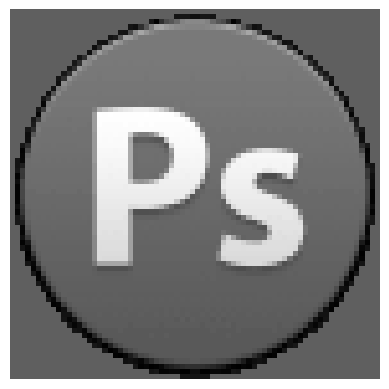

In [63]:
I = cv2.imread("icon01.png", 0)
plt.imshow(I, cmap = "gray");plt.axis("off")
print(I.shape)

(-0.5, 47.5, 47.5, -0.5)

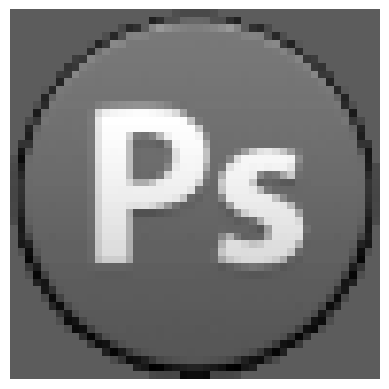

In [64]:
I = cv2.resize(I,(48, 48))
plt.imshow(I, cmap = "gray");plt.axis("off")

In [66]:
def DFT(arr):
    width, height = arr.shape
    array = np.copy(arr)    
    new_img = np.zeros_like(arr, dtype = np.complexfloating)
    for row in trange(width):
        for column in range(height):
            for x in range(width):
                for y in range(height):
                    new_img[row, column] += (array[x, y] * np.exp(-2j * np.pi * ((row  *  x  / width ) + (column * y / height)))) / (width * height)
    return new_img
new_img = DFT(I)

  0%|          | 0/48 [00:00<?, ?it/s]

In [68]:
def IDFT(arr):
    width, height = arr.shape
    array = np.copy(arr)    
    i_new_img = np.zeros_like(arr, dtype = np.complexfloating)
    for row in trange(width):
        for column in range(height):
            for x in range(width):
                for y in range(height):
                    i_new_img[row, column] += array[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height)) 
    return i_new_img.astype(np.uint8)
i_new_img = IDFT(new_img)

  0%|          | 0/48 [00:00<?, ?it/s]

D:\New folder\ipykernel_7720\1743216231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


In [6]:
def energy_Top_Left (arr, value):
    new_restructor = np.copy(arr)
    new_restructor[value:] = 0
    new_restructor[...,value:] = 0
    return new_restructor

**Invese DFT by restructed 5, 10, 30 and 35 respectly pixel**

In [69]:
img_5 = energy_Top_Left(new_img, 5)
i_new_img_5 = IDFT(img_5)
img_10= energy_Top_Left(new_img, 10)
i_new_img_10 = IDFT(img_10)
img_30 = energy_Top_Left(new_img, 30)
i_new_img_30 = IDFT(img_30)
img_35 = energy_Top_Left(new_img, 35)
i_new_img_35 = IDFT(img_35) 

  0%|          | 0/48 [00:00<?, ?it/s]

D:\New folder\ipykernel_7720\1743216231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

In [8]:
def energy_Bottm_Right (arr, value):
    
    new_restructor = np.copy(arr)
    new_restructor[:-value] = 0
    new_restructor[...,:-value] = 0
    return new_restructor

**Invese DFT by restructed 10 pixel Bottm Right**

In [70]:
img_10b = energy_Bottm_Right(new_img, 10)
i_new_img_10b = IDFT(img_10b)
img_25 = energy_Bottm_Right(new_img, 25)
i_new_img_25 = IDFT(img_25)
img_40 = energy_Bottm_Right(new_img, 40)
i_new_img_40 = IDFT(img_40)
img_45 = energy_Bottm_Right(new_img, 45)
i_new_img_45 = IDFT(img_45)

  0%|          | 0/48 [00:00<?, ?it/s]

D:\New folder\ipykernel_7720\1743216231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

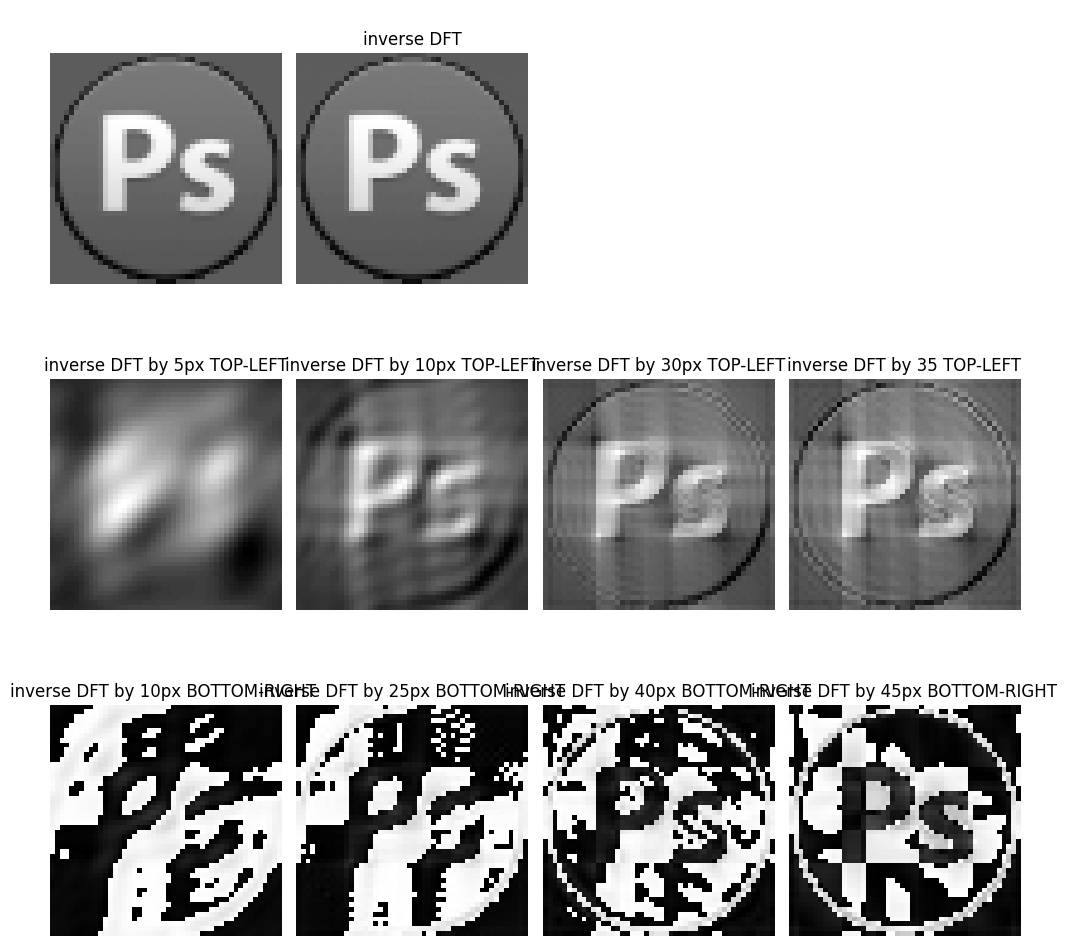

In [71]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off")
axes[0, 2].axis("off")
axes[0, 3].axis("off")
axes[0, 1].imshow(i_new_img, cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("inverse DFT")
axes[1, 0].imshow(i_new_img_5, cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("inverse DFT by 5px TOP-LEFT")
axes[1, 1].imshow(i_new_img_10, cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("inverse DFT by 10px TOP-LEFT")
axes[1, 2].imshow(i_new_img_30, cmap = "gray");axes[1, 2].axis("off");axes[1, 2].set_title("inverse DFT by 30px TOP-LEFT")
axes[1, 3].imshow(i_new_img_35, cmap = "gray");axes[1, 3].axis("off");axes[1, 3].set_title("inverse DFT by 35 TOP-LEFT")
axes[2, 0].imshow(i_new_img_10b, cmap = "gray");axes[2, 0].axis("off");axes[2, 0].set_title("inverse DFT by 10px BOTTOM-RIGHT ")
axes[2, 1].imshow(i_new_img_25, cmap = "gray");axes[2, 1].axis("off");axes[2, 1].set_title("inverse DFT by 25px BOTTOM-RIGHT")
axes[2, 2].imshow(i_new_img_40, cmap = "gray");axes[2, 2].axis("off");axes[2, 2].set_title("inverse DFT by 40px BOTTOM-RIGHT")
axes[2, 3].imshow(i_new_img_45, cmap = "gray");axes[2, 3].axis("off");axes[2, 3].set_title("inverse DFT by 45px BOTTOM-RIGHT")
plt.tight_layout()
plt.show()

In [11]:
def amplitude(arr):
    R = np.real(arr)
    Im = np.imag(arr)
    return np.sqrt(np.add(np.power(R, 2), np.power(Im, 2)))
def phase(arr):
    R = np.real(arr)
    Im = np.imag(arr)
    return np.arctan2(Im, R)

In [140]:
def pos(arr) -> np.array:
    width, heigth = arr.shape
    shift = np.zeros_like((width//2, heigth//2))
    toUse = np.copy(arr)

    shift = np.copy(toUse[:width//2, :heigth//2])
    toUse[:width//2, :heigth//2] = toUse[width//2:, heigth//2:]
    toUse[width//2:, heigth//2:] = shift

    shift = np.copy(toUse[width//2:, :heigth//2])
    toUse[width//2:, :heigth//2] = toUse[:width//2, heigth//2:]
    toUse[:width//2, heigth//2:] = shift
    return toUse

In [141]:
ampl = amplitude(new_img)
phas = phase(new_img)
newAmplitude = pos(ampl)
logAmpl = np.log(newAmplitude)

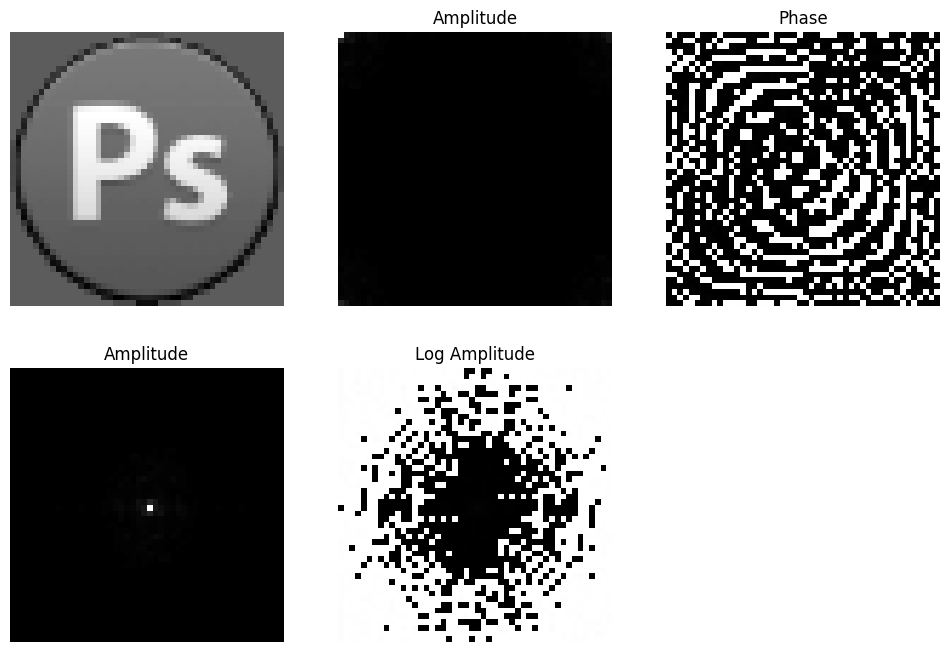

In [142]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off")
axes[0, 1].imshow(ampl.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("Amplitude")
axes[0, 2].imshow(phas.astype(np.uint8), cmap = "gray");axes[0, 2].axis("off");axes[0, 2].set_title("Phase")
axes[1, 0].imshow(newAmplitude.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("Amplitude")
axes[1, 1].imshow(logAmpl.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("Log Amplitude")
axes[1, 2].axis("off")
plt.show()

In [1]:
def add_noise(img): 
    row , col = img.shape 
    number_of_pixels = random.randint(2000, 3000) 
    for i in range(number_of_pixels): 
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        img[y_coord][x_coord] = 255
    number_of_pixels = random.randint(2000 , 3000) 
    for i in range(number_of_pixels): 
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        img[y_coord][x_coord] = 0
    return img 
  
img = cv2.imread('sample4.jpg', cv2.IMREAD_GRAYSCALE) 
cv2.imwrite('salt-and-pepper-sample2.jpg', add_noise(img)) 

NameError: name 'np' is not defined

(72, 72)


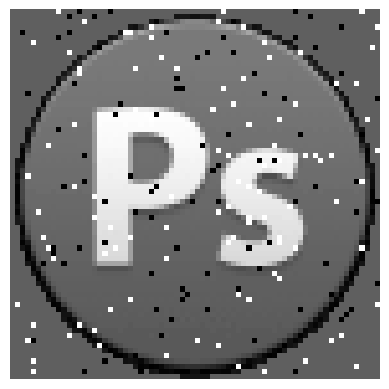

In [133]:
newI = cv2.imread("salt-and-pepper-icon1.png", 0)
plt.imshow(newI, cmap = "gray");plt.axis("off")
print(newI.shape)

In [176]:
newI = cv2.resize(newI,(50, 50))

In [135]:
ni = DFT(newI)

  0%|          | 0/50 [00:00<?, ?it/s]

In [143]:
amplI = pos(ni)

In [168]:
def filt(arr, C):
    rows, cols = amplI.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - C:crow + C, ccol - C:ccol + C] = 1
    mask = np.multiply(arr, mask)
    return pos(mask)

In [172]:
def edges(arr, C):
    rows, cols = amplI.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones(amplI.shape, np.uint8)
    mask[crow - C:crow + C, ccol - C:ccol + C] = 0
    mask = np.multiply(arr, mask)
    return pos(mask)

In [183]:
fil = filt(amplI, 10)
fil = IDFT(fil)

  0%|          | 0/50 [00:00<?, ?it/s]

D:\New folder\ipykernel_7720\1743216231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


In [184]:
edge = edges(amplI, 2)
edge = IDFT(edge)

  0%|          | 0/50 [00:00<?, ?it/s]

D:\New folder\ipykernel_7720\1743216231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  return i_new_img.astype(np.uint8)


Text(0.5, 1.0, 'edges Image')

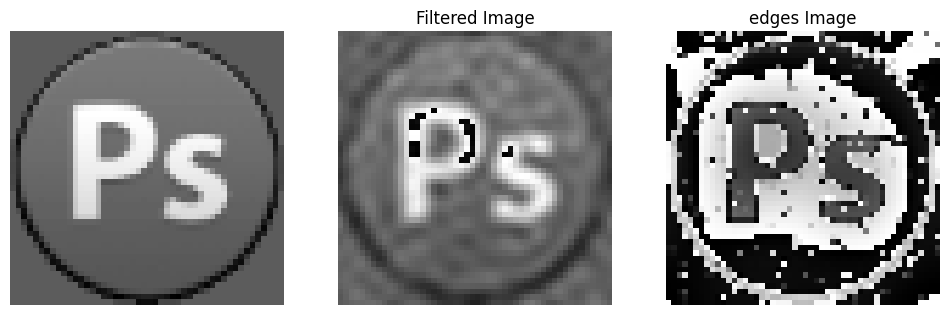

In [185]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
axes[0].imshow(I, cmap = "gray");axes[0].axis("off");axes[1].set_title("original Image")
axes[1].imshow(fil, cmap = "gray");axes[1].axis("off");axes[1].set_title("Filtered Image")
axes[2].imshow(edge, cmap = "gray");axes[2].axis("off");axes[2].set_title("edges Image")

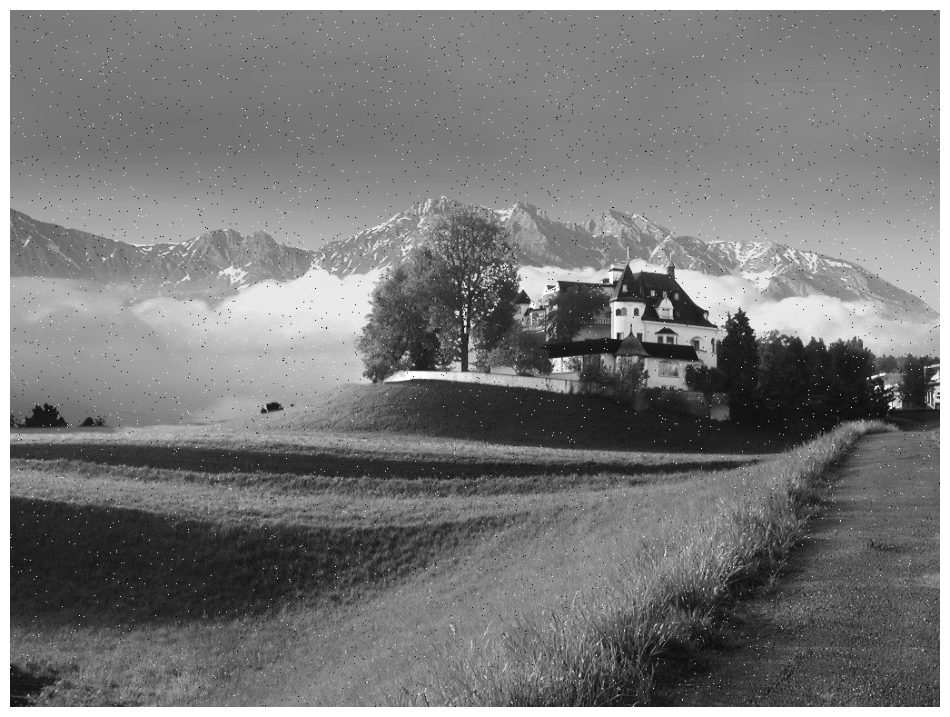

In [166]:
image = cv2.imread('salt-and-pepper-sample2.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(12, 10))
plt.imshow(image, cmap = "gray");plt.axis("off")
plt.show()

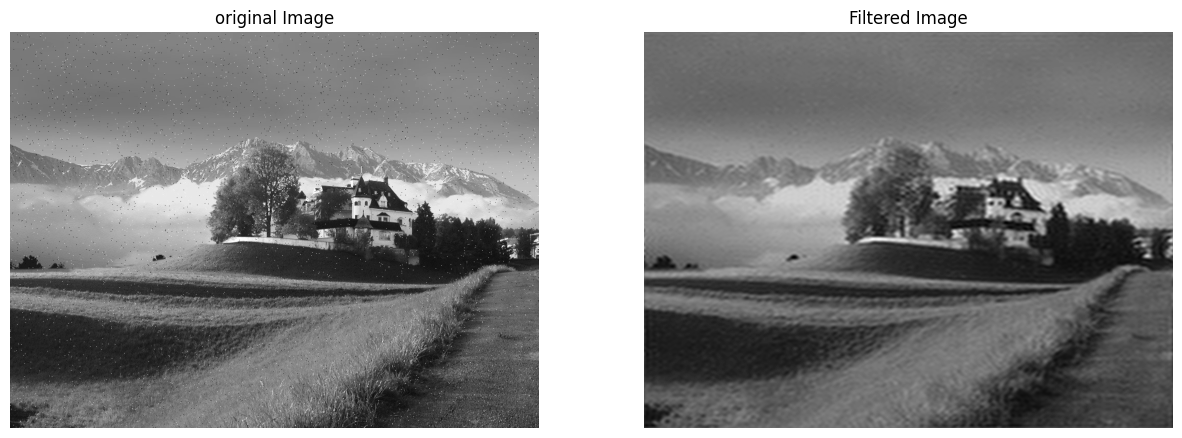

In [115]:
image = cv2.imread('salt-and-pepper-sample2.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
C = 80  
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow - C:crow + C, ccol - C:ccol + C] = 1
f_shift_filtered = f_shift * mask
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
axes[0].imshow(image, cmap = "gray");axes[0].axis("off");axes[0].set_title('original Image')
axes[1].imshow(image_back, cmap = "gray");axes[1].axis("off");axes[1].set_title('Filtered Image')
plt.show()

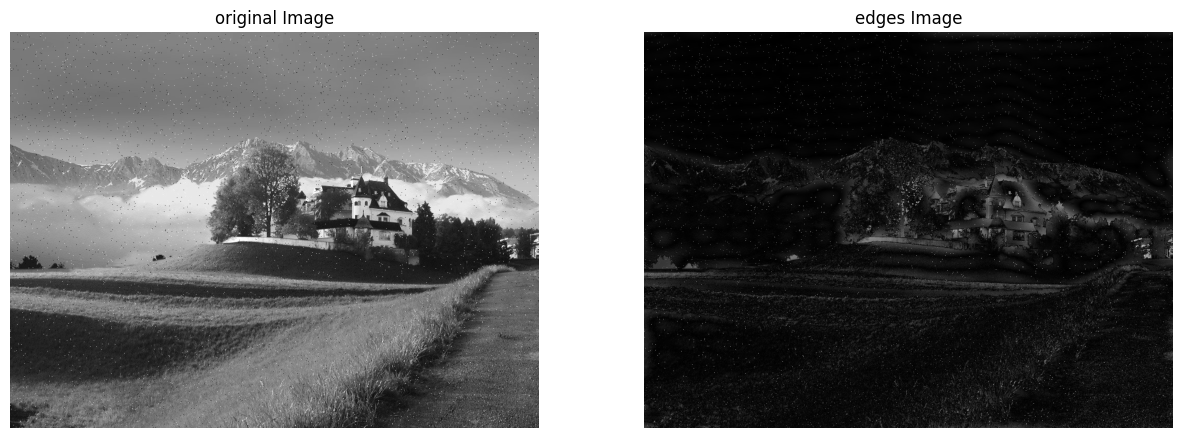

In [182]:
image = cv2.imread('salt-and-pepper-sample2.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
C = 13  
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[crow - C:crow + C, ccol - C:ccol + C] = 0
f_shift_filtered = f_shift * mask
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
axes[0].imshow(image, cmap = "gray");axes[0].axis("off");axes[0].set_title('original Image')
axes[1].imshow(image_back, cmap = "gray");axes[1].axis("off");axes[1].set_title('edges Image')
plt.show()